#[Guía 2](https://drive.google.com/file/d/1p7UlCs_gY-GNhqWKgKt2xdhvsqf50gXL/view?usp=sharing)

## Imports, params & funcs.

In [ ]:
import numpy as np
import matplotlib as mtp
plt = mtp.pyplot
import math
import pandas as pd
import seaborn as sns
import scipy as sp
poly = np.polynomial.Polynomial
C = np.polynomial.Chebyshev
ip = sp.interpolate  
la = np.linalg
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16, 7]
plt.rcParams['axes.grid'] = True
mtp.rcParams['axes.facecolor'] = 'F2D7D5'
mtp.rcParams['axes.prop_cycle'] = mtp.cycler(color=['c', 'k', 'r'])

In [1]:
def Biseccion(f, a, b, n, tol=False, preview=False, p=False):
    '''
    Aproxima el valor de una raíz de f en el intervalo [a, b] utilizando el método de bisección, n veces.
    Si el ultimo intervalo es menor a tol, se devuelve el punto medio de dicho intervalo sin llegar a la iteración n
    Tanto p o preview = True van mostrando los valores para cada ciclo. Si es falso, la función devuelve sin mostrar nada.
    '''
    a = a
    b = b
    tol = tol
    for k in range(n):
        f_a = f(a)
        f_b = f(b)
        c = (a+b)/2
        f_c = f(c)
        prod = f_a * f_c
        if f_c == 0:
            return c
        if tol:
            max_err = abs(b - a)
            if max_err < tol:
                return c
        if prod > 0:
            if preview or p is True:
                print(f'Paso {k+1}: Intervalo = [{a} ; {b}]. Raíz ≈ {c}, Prod = +')
            a = c
        elif prod < 0:
            if preview or p is True:
                print(f'Paso {k+1}: Intervalo = [{a} ; {b}]. Raíz ≈ {c}, Prod = -')
            b = c
    return c

def RegulaFalsi(f, a, b, n, tol=False, preview=False, p=False):
    '''
    Aproxima el valor de una raíz de f en el intervalo [a, b] utilizando el método de bisección, n veces.
    Si el ultimo intervalo es menor a tol, se devuelve el punto medio de dicho intervalo sin llegar a la iteración n
    Tanto p o preview = True van mostrando los valores para cada ciclo. Si es falso, la función devuelve sin mostrar nada.
    '''
    a = a
    b = b
    tol = tol
    q = 0
    for k in range(n):
        f_a = f(a)
        f_b = f(b)
        c = (a * f_b - b * f_a)/(f_b-f_a)
        f_c = f(c)
        prod = f_a * f_c
        if f_c == 0:
            return c
        if tol:
            max_err = abs(b - a)
            if max_err < tol:
                return c
        if prod > 0:
            if preview or p is True:
                print(f'Paso {k+1}: Intervalo = [{a} ; {b}]. Raíz ≈ {c}, Prod = +')
            a = c
        elif prod < 0:
            if preview or p is True:
                print(f'Paso {k+1}: Intervalo = [{a} ; {b}]. Raíz ≈ {c}, Prod = -')
            b = c
        q = c
    if tol:
        print('No se alcanzó la tolerancia para ', n, 'iteraciones')
    return q

def NewtonRaphson(f, df, x0, n, tol, p=False, all_roots = False):
    tol = tol
    xn = x0
    roots = {}
    if p:
        print('x0 =', xn)
    for k in range(n):
        f_n = f(xn)
        if abs(f_n) < tol:
            if p:
                print('Raíz:', xn, '. Iteraciones:', k)
            if all_roots:
                return roots    
            return xn
        df_n = df(xn)
        if df_n == 0:
            raise ValueError('df(xn) debe ser != 0')
        if all_roots:
            roots[k] = xn
        xn = xn - f_n/df_n
        if p:
            print('x'+str(k+1) + ' =', xn)
    print('No se supero la tolerancia después de ', n, 'iteraciones.')
    if all_roots:
        return roots
    return xn

def Secante(f, x0, x1, n, tol, p=False, all_roots=False):
    tol = tol
    x0 = x0
    x1 = x1
    roots = {}
    for k in range(n):
        f_0 = f(x0)
        f_1 = f(x1)
        x2 = x1 - (f_1/(f_1-f_0)*(x1-x0))
        f_2 = f(x2)
        if all_roots:
            roots[k] = x2
        if abs(f_2) < tol:
            if p:
                print('Raíz:', x2, '. Iteraciones:', k)
            if all_roots:
                return roots    
            return x2
        if p:
            print(
            f'x{k}: {x0}\nx{k+1}: {x1}\nx{k+2}: {x2}\n ---------------------------------------------')
        x0 = x1
        x1 = x2
        
    print('No se supero la tolerancia después de ', n, 'iteraciones.')
    if all_roots:
        return roots
    return x2

def PuntoFijo(g, x0, n, tol, p=False, all_roots=False):
    x = x0
    if p:
        print('x'+str(0)+' =', x)
    if all_roots:
        all_roots = []
        all_roots.append(x)
    for k in range(n):  
        x = g(x)
        if p:
            print('x'+str(k+1)+' =', x)
        if all_roots:
            all_roots.append(x)
        if abs(x-g(x)) < tol:
            if all_roots:
                return all_roots
            return x
    print('No se alcanzó la tolerancia. Último x:', x)
    if all_roots:
        return all_roots
    return x

def GaussSeidel(A, b, X0, n, tol, conv = False, p = False, all_roots = False):
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    DL = D + L
    DLinv = la.inv(DL)
    X = X0
    if all_roots:
        all_roots = {}
        all_roots[0] = X
    Bgs = - DLinv @ U
    Cgs = DLinv @ b
    if conv:
        lambdas = la.eigvals(Bgs)
        if all(np.abs(l) < 1 for l in lambdas):
            print('El método de Gauss-Seidel converge para este sistema. Autovalores:\n', lambdas)
        else:
            print('Gauss-Seidel no converge para este sistema. Autovalors:\n', lambdas)
        print('--------------------------------------------------------------')
    if p:
        print('X' + str(0) + ' =\n', X)
    for k in range(1, n + 1):
        old_X = X
        X = Bgs @ old_X + Cgs
        if p:
            print('X' + str(k) + ' =\n', X)
        if all_roots:
            all_roots[k] = X
        if la.norm(X - old_X) < tol:
            if all_roots:
                return all_roots
            return X
    print('No se alcanzó la tolerancia. Último X =\n', X)
    if all_roots:
        return all_roots
    return X

def Jacobi(A, b, X0, n, tol, conv = False, p = False, all_roots = False):
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    D_inv = la.inv(D)
    X = X0
    if all_roots:
        all_roots = {}
        all_roots[0] = X
    Bj = - D_inv @ (L + U)
    Cj = D_inv @ b
    if conv:
        lambdas = la.eigvals(Bj)
        if all(np.abs(l) < 1 for l in lambdas):
            print('El método de Jacobi converge para este sistema. Autovalores:\n', lambdas)
        else:
            print('Jacobi no converge para este sistema. Autovalors:\n', lambdas)
        print('--------------------------------------------------------------')
    if p:
        print('X' + str(0) + ' =\n', X)
    for k in range(1, n + 1):
        old_X = X
        X = Bj @ old_X + Cj
        if p:
            print('X' + str(k) + ' =\n', X)
        if all_roots:
            all_roots[k] = X
        if la.norm(X - old_X) < tol:
            if all_roots:
                return all_roots
            return X
    print('No se alcanzó la tolerancia. Último X =\n', X)
    if all_roots:
        return all_roots
    return X

## Ejercicio 1

In [ ]:
def Biseccion_old(f, a, b, n, preview=False, p=False):
    a = a
    b = b
    for k in range(n):
        f_a = f(a)
        f_b = f(b)
        c = (a+b)/2
        f_c = f(c)
        prod = f_a * f_c
        if f_c == 0:
            return c
        elif prod > 0:
            if preview or p is True:
                print(f'Paso {k+1}: Intervalo = [{a} ; {b}]. Raíz ≈ {c}, Prod = +')
            a = c
        elif prod < 0:
            if preview or p is True:
                print(f'Paso {k+1}: Intervalo = [{a} ; {b}]. Raíz ≈ {c}, Prod = -')
            b = c
    return c
            
def f(x):
    return x**2 -2

Biseccion_old(f, 1, 2, 11 )

1.41455078125

## Ejercicio 2

In [ ]:
def f(x):
    return x**2 -2
    
Biseccion(f, 1, 2, 15, tol=10**(-3), p=True)

Paso 1: Intervalo = [1 ; 2]. Raíz ≈ 1.5, Prod = -
Paso 2: Intervalo = [1 ; 1.5]. Raíz ≈ 1.25, Prod = +
Paso 3: Intervalo = [1.25 ; 1.5]. Raíz ≈ 1.375, Prod = +
Paso 4: Intervalo = [1.375 ; 1.5]. Raíz ≈ 1.4375, Prod = -
Paso 5: Intervalo = [1.375 ; 1.4375]. Raíz ≈ 1.40625, Prod = +
Paso 6: Intervalo = [1.40625 ; 1.4375]. Raíz ≈ 1.421875, Prod = -
Paso 7: Intervalo = [1.40625 ; 1.421875]. Raíz ≈ 1.4140625, Prod = +
Paso 8: Intervalo = [1.4140625 ; 1.421875]. Raíz ≈ 1.41796875, Prod = -
Paso 9: Intervalo = [1.4140625 ; 1.41796875]. Raíz ≈ 1.416015625, Prod = -
Paso 10: Intervalo = [1.4140625 ; 1.416015625]. Raíz ≈ 1.4150390625, Prod = -


1.41455078125

## Ejercicio 3

In [ ]:
def f(x):
    return x**3 - 5

error_1 = abs(sp.optimize.fsolve(f, 1.6) - Biseccion(f, 1.5, 2, 1000, 10**(-10)))
error_2 = abs(sp.optimize.fsolve(f, 1.7) - Biseccion(f, 1.5, 2, 1000, 10**(-10)))
error_3 = abs(sp.optimize.fsolve(f, 1.8) - Biseccion(f, 1.5, 2, 1000, 10**(-10)))

print(error_1, error_2, error_3)

[1.11872733e-11] [1.11883836e-11] [1.11883836e-11]


## Ejercicio 4

In [ ]:
def f(x):
    return x - np.tan(x) + .5

Biseccion(f, 0.5, 1.5, 50, 10**(-5), p=True)

Paso 1: Intervalo = [0.5 ; 1.5]. Raíz ≈ 1.0, Prod = -
Paso 2: Intervalo = [0.5 ; 1.0]. Raíz ≈ 0.75, Prod = +
Paso 3: Intervalo = [0.75 ; 1.0]. Raíz ≈ 0.875, Prod = +
Paso 4: Intervalo = [0.875 ; 1.0]. Raíz ≈ 0.9375, Prod = +
Paso 5: Intervalo = [0.9375 ; 1.0]. Raíz ≈ 0.96875, Prod = +
Paso 6: Intervalo = [0.96875 ; 1.0]. Raíz ≈ 0.984375, Prod = -
Paso 7: Intervalo = [0.96875 ; 0.984375]. Raíz ≈ 0.9765625, Prod = -
Paso 8: Intervalo = [0.96875 ; 0.9765625]. Raíz ≈ 0.97265625, Prod = +
Paso 9: Intervalo = [0.97265625 ; 0.9765625]. Raíz ≈ 0.974609375, Prod = +
Paso 10: Intervalo = [0.974609375 ; 0.9765625]. Raíz ≈ 0.9755859375, Prod = -
Paso 11: Intervalo = [0.974609375 ; 0.9755859375]. Raíz ≈ 0.97509765625, Prod = -
Paso 12: Intervalo = [0.974609375 ; 0.97509765625]. Raíz ≈ 0.974853515625, Prod = +
Paso 13: Intervalo = [0.974853515625 ; 0.97509765625]. Raíz ≈ 0.9749755859375, Prod = +
Paso 14: Intervalo = [0.9749755859375 ; 0.97509765625]. Raíz ≈ 0.97503662109375, Prod = -
Paso 15: Inter

0.9750175476074219

## Ejercicio 5

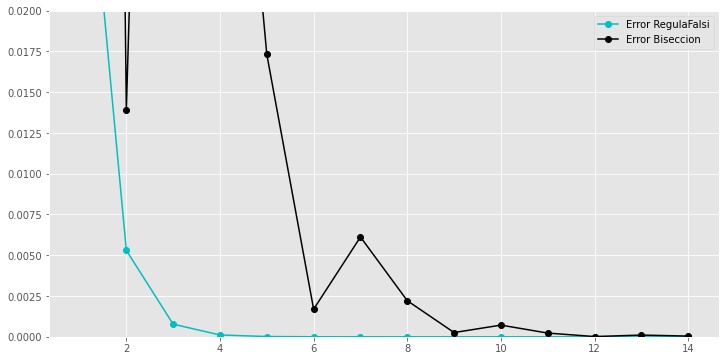

In [ ]:
def f(x):
    return x**2 - 5
    
arr_err_rf = []
arr_err_bs = []

for n in range(1, 15):
    rf = RegulaFalsi(f, 2, 3, n)
    bs = Biseccion(f, 2, 3, n)
    err_rf = abs(sp.optimize.fsolve(f, 2.2) - rf)
    err_bs = abs(sp.optimize.fsolve(f, 2.2) - bs)
    arr_err_rf.append(err_rf)
    arr_err_bs.append(err_bs)

plt.plot(list(range(1, 15)), arr_err_rf, marker='o', label='Error RegulaFalsi')
plt.plot(list(range(1, 15)), arr_err_bs, marker='o', label='Error Biseccion')
plt.ylim(0, 0.02)
plt.legend()

## Ejercicio 6

{0: 5, 1: 4.5000907998595245, 2: 4.000337574649396, 3: 3.501008047083363, 4: 3.0028281378386277, 5: 2.5077576803352013, 6: 2.021026104623261, 7: 1.5561488961254821, 8: 1.1451460746529551, 9: 0.8476198371500109, 10: 0.7147302977178325, 11: 0.6936063804964254}


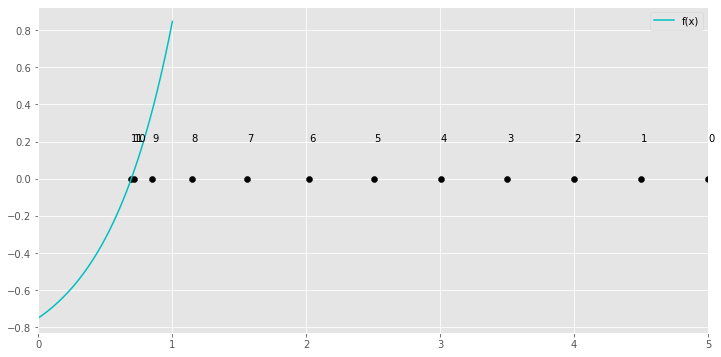

In [ ]:
def f(x):
    return (1/4 * np.exp(2*x)-1)

def df(x):
    return 1/2 * np.exp(2*x)

n = 0
NR500 = NewtonRaphson(f, df, 5, 100, 10**(-5), all_roots=True)
x_plot = np.linspace(0, 1, 500)
print(NR500)
for key in NR500:
    plt.scatter(NR500[key], 0, color='k')
    plt.annotate(str(key),(NR500[key], .2))
plt.xlim(0, 5)
plt.plot(x_plot, f(x_plot), label='f(x)')

plt.legend()

## Ejercicio 7

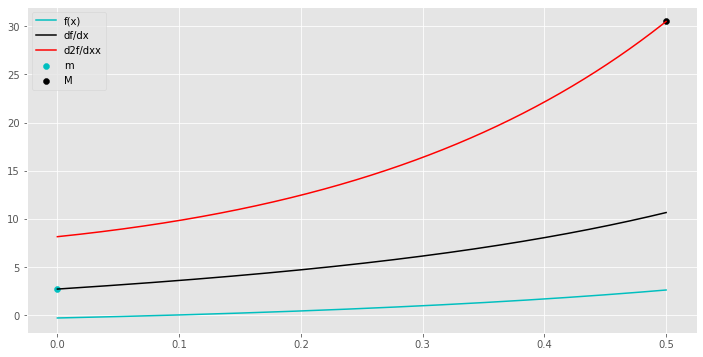

In [ ]:
def f(x):
    return np.exp(x**2+x+1)-np.exp(x**3)-2

def df(x):
    return 2*x*np.exp((x**2)+x+1)-3*(x**2)*np.exp(x**3)+np.exp(x**2+x+1)

def d2f(x):
    return -6*x*np.exp(x**3)+4*x*np.exp(x**2+x+1)+4*x**2*np.exp(x**2+x+1)-9*x**4*np.exp(x**3)+3*np.exp(x**2+x+1)

x_plot = np.linspace(0, 1/2, 1000)

plt.plot(x_plot, f(x_plot), label='f(x)')
plt.plot(x_plot, df(x_plot), label='df/dx')
plt.plot(x_plot, d2f(x_plot), label='d2f/dxx')
plt.scatter(0, df(0), label='m')
plt.scatter(.5, d2f(.5), label='M')
plt.legend()

In [ ]:
M = d2f(.5)
m = df(0)
print(M, m)

R = 2*m/M
print(R)

30.490774691983816 2.718281828459045
0.1783019195752803


In [ ]:
Biseccion(f, 0, .5, 3, p=True)

Paso 1: Intervalo = [0 ; 0.5]. Raíz ≈ 0.25, Prod = -
Paso 2: Intervalo = [0 ; 0.25]. Raíz ≈ 0.125, Prod = -
Paso 3: Intervalo = [0 ; 0.125]. Raíz ≈ 0.0625, Prod = +


0.0625

$I = [0; 0.125]$

In [ ]:
NewtonRaphson(f, df, 0, 5, 10**(-5), p=True)
NewtonRaphson(f, df, .125, 5, 10**(-5), p=True)
NewtonRaphson(f, df, 1, 5, tol=10**(-5), p=True)

x0 = 0
x1 = 0.10363832351432703
x2 = 0.09087160124185781
x3 = 0.09064430043606739
Raíz: 0.09064430043606739 . Iteraciones: 3
x0 = 0.125
x1 = 0.09219197009345208
x2 = 0.0906475043144908
x3 = 0.09064422965396264
Raíz: 0.09064422965396264 . Iteraciones: 3
x0 = 1
x1 = 0.705053081965479
x2 = 0.41925675836421084
x3 = 0.2012046211703981
x4 = 0.10541438385509239
x5 = 0.09093733478125239
No se supero la tolerancia después de  5 iteraciones.


0.09093733478125239

In [ ]:
NewtonRaphson(f, df, 0.0625, 10, 10**(-10), p=True)
#Con 3 iteraciones llego a error < 10**-10

x0 = 0.0625
x1 = 0.09177328006072791
x2 = 0.09064597322047395
x3 = 0.09064422964343767
Raíz: 0.09064422964343767 . Iteraciones: 3


0.09064422964343767

##Ejercicio 8

In [ ]:
def f(x):
    return 1/4 * np.exp(2*x) - 1

def df(x):
    return 1/2 * np.exp(2*x)

NewtonRaphson(f, df, 7, 15, 10**(-25), p=True)

x0 = 7
x1 = 6.500001663057438
x2 = 6.000006183701216
x3 = 5.500018471973948
x4 = 5.000051874141498
x5 = 4.500142664581182
x6 = 4.0003894137745695
x7 = 3.5010598166987315
x8 = 3.002879719012955
x9 = 2.5078087529925774
x10 = 2.021075822042479
x11 = 1.5561951212892304
x12 = 1.145184072378723
x13 = 0.847642448375433
x14 = 0.7147363076838749
x15 = 0.6936066344390693
No se supero la tolerancia después de  15 iteraciones.


0.6936066344390693

## Ejercicio 9

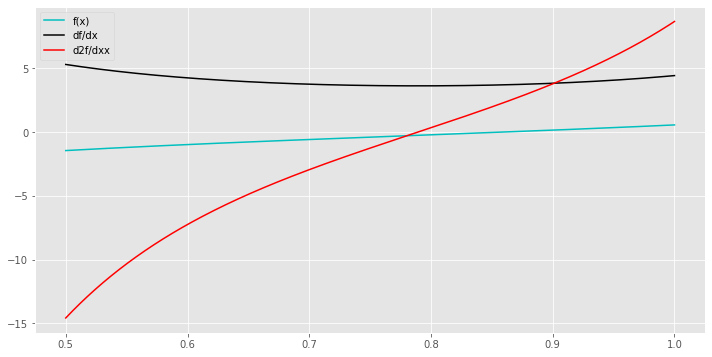

In [ ]:
def f(x):
    return np.tan(x) - 1/x

def df(x):
    return 1/(np.cos(x)**2) + 1/(x**2)

def d2f(x):
    return 2*np.sin(x)/(np.cos(x)**3) - 2/(x**3)

x_plot = np.linspace(.5, 1, 10000)

plt.plot(x_plot, f(x_plot), label='f(x)')
plt.plot(x_plot, df(x_plot), label='df/dx')
plt.plot(x_plot, d2f(x_plot), label='d2f/dxx')
plt.legend()

In [ ]:
m = min(df(x_plot))
M = d2f(1)
R = 2*m/M
print(R)

0.835280092193539


In [ ]:
Biseccion(f, 0.5, 1, 4, p=True)

Paso 1: Intervalo = [0.5 ; 1]. Raíz ≈ 0.75, Prod = +
Paso 2: Intervalo = [0.75 ; 1]. Raíz ≈ 0.875, Prod = -
Paso 3: Intervalo = [0.75 ; 0.875]. Raíz ≈ 0.8125, Prod = +
Paso 4: Intervalo = [0.8125 ; 0.875]. Raíz ≈ 0.84375, Prod = +


0.84375

$I = [ 0.8125 ; 0.875 ]$

In [ ]:
NewtonRaphson(f, df, 0.8125, 10, 10**(-5), p=True)
NewtonRaphson(f, df, 0.8725, 10, 10**(-5), p=True)
Biseccion(f, 0.8125, .8725, 10, 10**(-5), p=True)

x0 = 0.8125
x1 = 0.8607294103881412
x2 = 0.8603336383921426
Raíz: 0.8603336383921426 . Iteraciones: 2
x0 = 0.8725
x1 = 0.8603853237066301
x2 = 0.8603335898601201
Raíz: 0.8603335898601201 . Iteraciones: 2
Paso 1: Intervalo = [0.8125 ; 0.8725]. Raíz ≈ 0.8425, Prod = +
Paso 2: Intervalo = [0.8425 ; 0.8725]. Raíz ≈ 0.8575, Prod = +
Paso 3: Intervalo = [0.8575 ; 0.8725]. Raíz ≈ 0.865, Prod = -
Paso 4: Intervalo = [0.8575 ; 0.865]. Raíz ≈ 0.8612500000000001, Prod = -
Paso 5: Intervalo = [0.8575 ; 0.8612500000000001]. Raíz ≈ 0.859375, Prod = +
Paso 6: Intervalo = [0.859375 ; 0.8612500000000001]. Raíz ≈ 0.8603125, Prod = +
Paso 7: Intervalo = [0.8603125 ; 0.8612500000000001]. Raíz ≈ 0.86078125, Prod = -
Paso 8: Intervalo = [0.8603125 ; 0.86078125]. Raíz ≈ 0.860546875, Prod = -
Paso 9: Intervalo = [0.8603125 ; 0.860546875]. Raíz ≈ 0.8604296875, Prod = -
Paso 10: Intervalo = [0.8603125 ; 0.8604296875]. Raíz ≈ 0.86037109375, Prod = -


0.86037109375

In [ ]:
errNR = abs(NewtonRaphson(f, df, 0.84375, 5, 10**(-10)) - sp.optimize.fsolve(f, 0.84375))
errBIS =  abs(Biseccion(f, 0.8125, 0.8725, 5, 10**(-15)) - sp.optimize.fsolve(f, 0.84375))

print('Error con Newton Raphson:', errNR)
print('Error con Biseccion [.8125, .8725]:', errBIS)

Error con Newton Raphson: [0.]
Error con Biseccion [.8125, .8725]: [0.00095859]


In [ ]:
raiz =  NewtonRaphson(f, df, 0.84375, 5, 10**(-15))
print(raiz)

0.8603335890193797


## Ejercicio 10

In [ ]:
def f(x):
    return x**2 - 5

Secante(f, 1, 3, 7, 10**(-7), p=True)

x0: 1
x1: 3
x2: 2.0
 ---------------------------------------------
x1: 3
x2: 2.0
x3: 2.2
 ---------------------------------------------
x2: 2.0
x3: 2.2
x4: 2.238095238095238
 ---------------------------------------------
x3: 2.2
x4: 2.238095238095238
x5: 2.236051502145923
 ---------------------------------------------
Raíz: 2.236067970034716 . Iteraciones: 4


{0: 2.0,
 1: 2.2,
 2: 2.238095238095238,
 3: 2.236051502145923,
 4: 2.236067970034716}

## Ejercicio 11

### a )

(-5.0, 10.0)

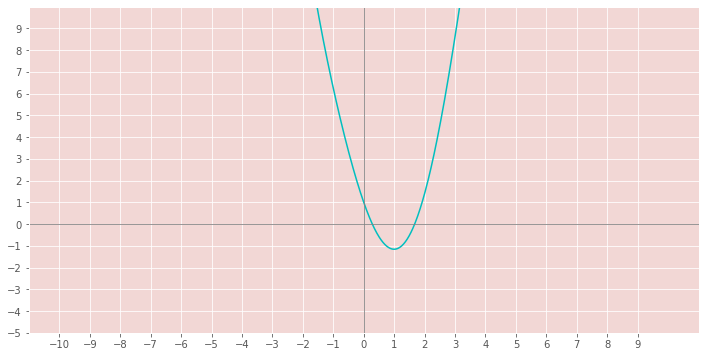

In [ ]:
def f(x):
    return np.exp(-x) + x**2 - 3 * np.sin(x)

def df(x):
    return -np.exp(-x) + 2*x - 3 * np.cos(x)

x_plot = np.linspace(-10, 10, 1000)
plt.plot(x_plot, f(x_plot))
plt.axhline(color='gray', lw=.8)
plt.axvline(color='gray', lw=.8)
plt.xticks(np.arange(-10, 10, 1))
plt.yticks(np.arange(-5, 10, 1))
plt.ylim(-5, 10)


In [ ]:
BIS = Biseccion(f, 0, 1, 5, 10**(-5), p=True)
NR = NewtonRaphson(f, df, 0, 5, 10**(-5), p=True)
SEC = Secante(f, 0, 1, 5, 10**(-5), p=True)
RF = RegulaFalsi(f, 0, 1, 5, 10**(-5), p=True)

Paso 1: Intervalo = [0 ; 1]. Raíz ≈ 0.5, Prod = -
Paso 2: Intervalo = [0 ; 0.5]. Raíz ≈ 0.25, Prod = +
Paso 3: Intervalo = [0.25 ; 0.5]. Raíz ≈ 0.375, Prod = -
Paso 4: Intervalo = [0.25 ; 0.375]. Raíz ≈ 0.3125, Prod = -
Paso 5: Intervalo = [0.25 ; 0.3125]. Raíz ≈ 0.28125, Prod = +
x0 = 0
x1 = 0.25
x2 = 0.28110586149291883
x3 = 0.28166329389581124
Raíz: 0.28166329389581124 . Iteraciones: 3
x0: 0
x1: 1
x2: 0.46370714568303173
 ---------------------------------------------
x1: 1
x2: 0.46370714568303173
x3: 0.058393894751299635
 ---------------------------------------------
x2: 0.46370714568303173
x3: 0.058393894751299635
x4: 0.30475724742120963
 ---------------------------------------------
x3: 0.058393894751299635
x4: 0.30475724742120963
x5: 0.28426465935099454
 ---------------------------------------------
x4: 0.30475724742120963
x5: 0.28426465935099454
x6: 0.2816276846350667
 ---------------------------------------------
No se supero la tolerancia después de  5 iteraciones.
Paso 1: Int

In [ ]:
raiz = sp.optimize.fsolve(f, 0)

errBIS = abs(raiz-BIS)
errNR = abs(raiz-NR)
errRF = abs(raiz-RF)
errSEC = abs(raiz-SEC)

print(f'Error Bisección: {errBIS}\nError Newton-Raphson: {errNR}\nError RegulaFalsi: {errRF}\nError Secante: {errSEC}')

Error Bisección: [0.00041348]
Error Newton-Raphson: [1.81383569e-07]
Error RegulaFalsi: [6.93974602e-05]
Error Secante: [3.57906443e-05]


### b )

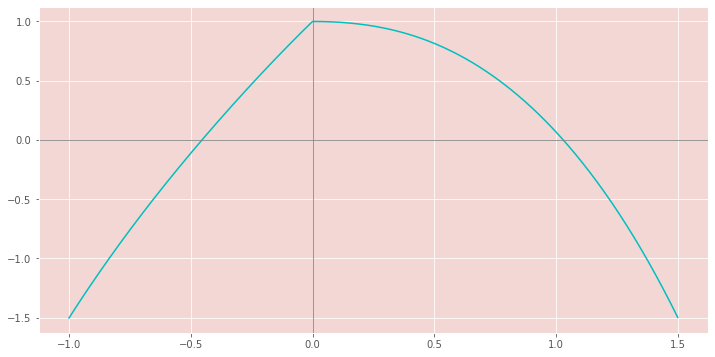

In [ ]:
def f(x):
    return np.arctan(x) + 2 - np.exp(np.abs(x))

def df(x):
    return (-x*(x**2+1)*np.exp(np.abs(x)) + np.abs(x))/((x**2+1)*np.abs(x))

x_plot = np.linspace(-1, 1.5, 1000)
plt.plot(x_plot, f(x_plot))
plt.axhline(color='gray', lw=.8)
plt.axvline(color='gray', lw=.8)


In [ ]:
print('Bisección:')
BIS = Biseccion(f, 1, 1.5, 5, 10**(-5), p=True)
print('------------------------------')
print('Newton-Raphson:')
NR = NewtonRaphson(f, df, 1, 5, 10**(-5), p=True)
print('------------------------------')
print('Secante:')
SEC = Secante(f, 1, 1.5, 5, 10**(-5), p=True)
print('------------------------------')
print('Regula Falsi:')
RF = RegulaFalsi(f, 1, 1.5, 5, 10**(-5), p=True)

Bisección:
Paso 1: Intervalo = [1 ; 1.5]. Raíz ≈ 1.25, Prod = -
Paso 2: Intervalo = [1 ; 1.25]. Raíz ≈ 1.125, Prod = -
Paso 3: Intervalo = [1 ; 1.125]. Raíz ≈ 1.0625, Prod = -
Paso 4: Intervalo = [1 ; 1.0625]. Raíz ≈ 1.03125, Prod = -
Paso 5: Intervalo = [1 ; 1.03125]. Raíz ≈ 1.015625, Prod = +
------------------------------
Newton-Raphson:
x0 = 1
x1 = 1.0302559999713952
x2 = 1.029615694295077
Raíz: 1.029615694295077 . Iteraciones: 2
------------------------------
Secante:
x0: 1
x1: 1.5
x2: 1.0214290658583844
 ---------------------------------------------
x1: 1.5
x2: 1.0214290658583844
x3: 1.027369067231967
 ---------------------------------------------
x2: 1.0214290658583844
x3: 1.027369067231967
x4: 1.0296285188467884
 ---------------------------------------------
Raíz: 1.0296153823168577 . Iteraciones: 3
------------------------------
Regula Falsi:
Paso 1: Intervalo = [1 ; 1.5]. Raíz ≈ 1.0214290658583842, Prod = +
Paso 2: Intervalo = [1.0214290658583842 ; 1.5]. Raíz ≈ 1.027369067231

In [ ]:
raiz = sp.optimize.fsolve(f, 1)

errBIS = abs(raiz-BIS)
errNR = abs(raiz-NR)
errRF = abs(raiz-RF)
errSEC = abs(raiz-SEC)

print(f'Error Bisección: {errBIS}\nError Newton-Raphson: {errNR}\nError RegulaFalsi: {errRF}\nError Secante: {errSEC}')

Error Bisección: [0.0139904]
Error Newton-Raphson: [2.91047435e-07]
Error RegulaFalsi: [4.6073182e-05]
Error Secante: [2.09307842e-08]


### c )

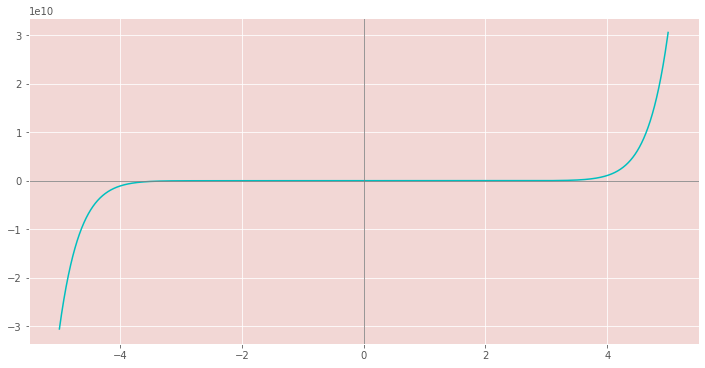

In [ ]:
def f(x):
    return x**15 - 2

def df(x):
    return 15*x**14

x_plot = np.linspace(-5, 5, 10000)
plt.plot(x_plot, f(x_plot))
plt.axhline(color='gray', lw=.8)
plt.axvline(color='gray', lw=.8)



In [ ]:
print('Bisección:')
BIS = Biseccion(f, 1, 1.1, 6, p=True)
print('------------------------------')
print('Newton-Raphson:')
NR = NewtonRaphson(f, df, 1.05, 6, 10**(-25), p=True)
print('------------------------------')
print('Secante:')
SEC = Secante(f, 1, 1.1, 6, 10**(-25), p=True)
print('------------------------------')
print('Regula Falsi:')
RF = RegulaFalsi(f, 1, 1.1, 6, p=True)

Bisección:
Paso 1: Intervalo = [1 ; 1.1]. Raíz ≈ 1.05, Prod = -
Paso 2: Intervalo = [1 ; 1.05]. Raíz ≈ 1.025, Prod = +
Paso 3: Intervalo = [1.025 ; 1.05]. Raíz ≈ 1.0375, Prod = +
Paso 4: Intervalo = [1.0375 ; 1.05]. Raíz ≈ 1.0437500000000002, Prod = +
Paso 5: Intervalo = [1.0437500000000002 ; 1.05]. Raíz ≈ 1.046875, Prod = +
Paso 6: Intervalo = [1.046875 ; 1.05]. Raíz ≈ 1.0484375, Prod = -
------------------------------
Newton-Raphson:
x0 = 1.05
x1 = 1.0473423937327357
x2 = 1.0472941383908068
x3 = 1.0472941228206283
x4 = 1.0472941228206267
x5 = 1.0472941228206267
x6 = 1.0472941228206267
No se supero la tolerancia después de  6 iteraciones.
------------------------------
Secante:
x0: 1
x1: 1.1
x2: 1.0314737768873723
 ---------------------------------------------
x1: 1.1
x2: 1.0314737768873723
x3: 1.0422942258357473
 ---------------------------------------------
x2: 1.0314737768873723
x3: 1.0422942258357473
x4: 1.0478518077100707
 ---------------------------------------------
x3: 1.04229

In [ ]:
raiz = sp.optimize.fsolve(f, 1)

errBIS = abs(raiz-BIS)
errNR = abs(raiz-NR)
errRF = abs(raiz-RF)
errSEC = abs(raiz-SEC)

print(f'Error Bisección: {errBIS}\nError Newton-Raphson: {errNR}\nError RegulaFalsi: {errRF}\nError Secante: {errSEC}')

Error Bisección: [0.00114338]
Error Newton-Raphson: [0.]
Error RegulaFalsi: [4.47868031e-05]
Error Secante: [8.8384855e-12]


## Ejercicio 12

In [ ]:
def g(x):
    return ((x**2 + 1)/2)**(1/2)

a = 0
b = .9999999

print('a:', a, 'b:', b)
print('g(a):', g(a), 'g(b):', g(b))
print('Distancia entre a y b:', abs(a-b))
print('Distancia entre g(a) y g(b):', abs(g(a)-g(b)))

a: 0 b: 0.9999999
g(a): 0.7071067811865476 g(b): 0.9999999500000013
Distancia entre a y b: 0.9999999
Distancia entre g(a) y g(b): 0.29289316881345373


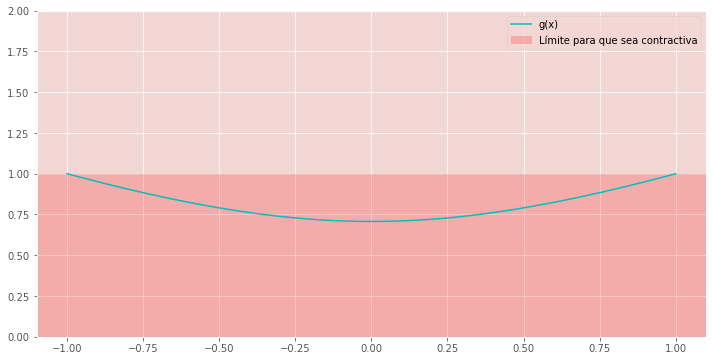

In [ ]:
x_plot = np.linspace(-1, 1, 1000)
plt.plot(x_plot, g(x_plot), label='g(x)')
plt.axhspan(0, 1, color='red', alpha=.2, label='Límite para que sea contractiva', lw=.7)
plt.ylim(0, 2)
plt.legend()

In [ ]:
def g_1(x):
    return x

In [ ]:
PF = PuntoFijo(g, 10000, 100, 10**(-5), p=True, all_roots=False)
print(PF)

x0 = 10000
x1 = 7071.067847220815
x2 = 5000.000075
x3 = 3535.5340296764225
x4 = 2500.000187499993
x5 = 1767.7672269702252
x6 = 1250.000393749938
x7 = 883.8840377490137
x8 = 625.0007968744919
x9 = 441.94286740129087
x10 = 312.50159843341197
x11 = 220.9731307460677
x12 = 156.25319918599865
x13 = 110.48995939871499
x14 = 78.13139934728446
x15 = 55.25176722949612
x16 = 39.07529770828638
x17 = 27.639454507924093
x18 = 19.55683314720977
x19 = 13.84683578923002
x20 = 9.81669143280722
x21 = 6.977371664421735
x22 = 4.984160678764045
x23 = 3.5945693533257685
x24 = 2.638269208768206
x25 = 1.9950519313960746
x26 = 1.5780101724905335
x27 = 1.3210064542771174
x28 = 1.1715498393670245
x29 = 1.08915770807558
x30 = 1.0455296535872263
x31 = 1.0230181465961943
x32 = 1.011574546997183
x33 = 1.0058039232704743
x34 = 1.0029061601332097
x35 = 1.001454134255069
x36 = 1.0007273312487697
x37 = 1.0003637317266867
x38 = 1.0001818823979323
x39 = 1.000090945333741
x40 = 1.0000454737007052
x41 = 1.0000227371088288
x

## Ejercicio 13

## Ejercicio 15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


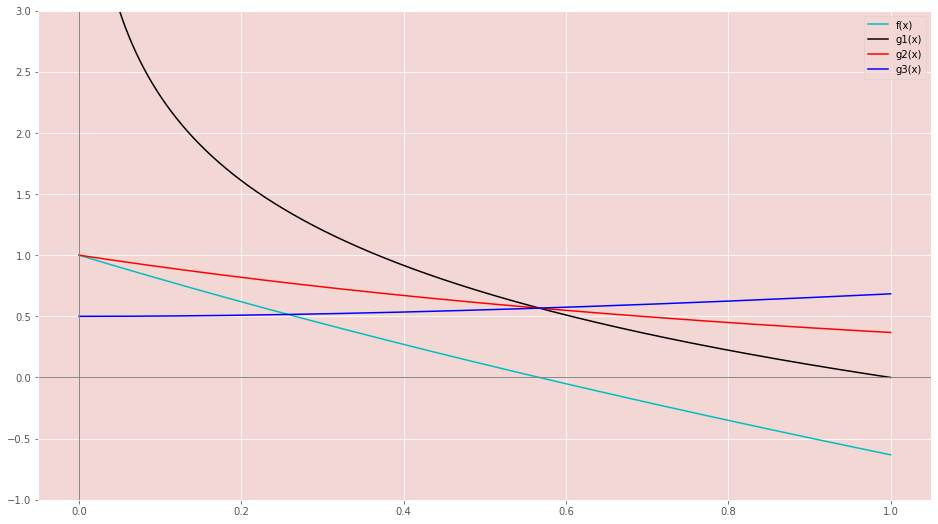

In [ ]:
def g1(x):
    return - np.log(x)

def g2(x):
    return np.exp(-x)

def g3(x):
    return (np.exp(-x) + x)/2

def f(x):
    return np.exp(-x) - x


x_plot = np.linspace(0, 1, 1000)
plt.plot(x_plot, f(x_plot), label='f(x)' )
plt.plot(x_plot, g1(x_plot), label='g1(x)')
plt.plot(x_plot, g2(x_plot), label='g2(x)')
plt.plot(x_plot, g3(x_plot), label='g3(x)', color='blue')
plt.ylim(-1, 3)
plt.axhline(color='gray', lw=.9)
plt.axvline(color='gray', lw=.9)
plt.legend()

In [ ]:
pf3 =  PuntoFijo(g3, .5, 5, 10**(-5),p=True, all_roots=True)
pf2 =  PuntoFijo(g2, .5, 5, 10**(-5),p=True, all_roots=True)

print(pf3)

x0 = 0.5
x1 = 0.5532653298563167
x2 = 0.5641671406395146
x3 = 0.5665004243214966
x4 = 0.5670042145692931
x5 = 0.5671131931969959
No se alcanzó la tolerancia. Último x: 0.5671131931969959
x0 = 0.5
x1 = 0.6065306597126334
x2 = 0.545239211892605
x3 = 0.5797030948780683
x4 = 0.5600646279389019
x5 = 0.5711721489772151
No se alcanzó la tolerancia. Último x: 0.5711721489772151
[0.5, 0.5532653298563167, 0.5641671406395146, 0.5665004243214966, 0.5670042145692931, 0.5671131931969959]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


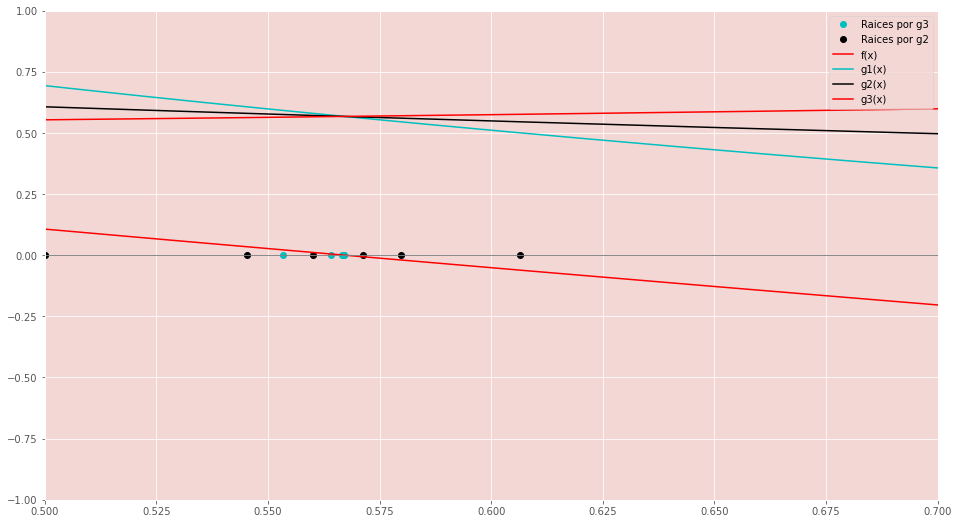

In [ ]:
plt.plot(pf3, np.zeros(len(pf3)), label='Raices por g3', lw=0, marker='o')
plt.plot(pf2, np.zeros(len(pf2)), label='Raices por g2', lw=0, marker='o')
x_plot = np.linspace(0, 1, 1000)
plt.plot(x_plot, f(x_plot), label='f(x)' )
plt.plot(x_plot, g1(x_plot), label='g1(x)')
plt.plot(x_plot, g2(x_plot), label='g2(x)')
plt.plot(x_plot, g3(x_plot), label='g3(x)')
plt.ylim(-1, 1)
plt.xlim(0.5, 0.7)
plt.axhline(color='gray', lw=.9)
plt.axvline(color='gray', lw=.9)
plt.legend()

## Ejercicio 17

In [ ]:
A = np.array([[3, 1, 1],
              [2, 6, 1],
              [1, 1, 4]])

b = np.array([[5],
              [9],
              [6]])

X0 = np.array([[0],
               [0],
               [0]])

j = Jacobi(A, b, X0, 15, 10**(-5), True)
GaussSeidel(A, b, X0, 15, 10**(-8), conv= True, p=True)

El método de Jacobi converge para este sistema. Autovalores:
 [-0.55753465  0.33333333  0.22420131]
--------------------------------------------------------------
No se alcanzó la tolerancia. Último X =
 [[1.00017506]
 [1.00014794]
 [1.00014484]]
El método de Gauss-Seidel converge para este sistema. Autovalores:
 [0.        +0.j         0.10416667+0.05511982j 0.10416667-0.05511982j]
--------------------------------------------------------------
X0 =
 [[0]
 [0]
 [0]]
X1 =
 [[1.66666667]
 [0.94444444]
 [0.84722222]]
X2 =
 [[1.06944444]
 [1.00231481]
 [0.98206019]]
X3 =
 [[1.00520833]
 [1.00125386]
 [0.99838445]]
X4 =
 [[1.00012056]
 [1.00022907]
 [0.99991259]]
X5 =
 [[0.99995278]
 [1.00003031]
 [1.00000423]]
X6 =
 [[0.99998849]
 [1.00000313]
 [1.00000209]]
X7 =
 [[0.99999826]
 [1.00000023]
 [1.00000038]]
X8 =
 [[0.9999998 ]
 [1.        ]
 [1.00000005]]
X9 =
 [[0.99999998]
 [1.        ]
 [1.00000001]]
X10 =
 [[1.]
 [1.]
 [1.]]
X11 =
 [[1.]
 [1.]
 [1.]]


array([[1.],
       [1.],
       [1.]])

In [ ]:
A = np.array([[5, 7, 6, 5],
              [7, 10, 8, 7],
              [6, 8, 10, 9],
              [5, 7, 9, 10]])

b = np.array([23, 32, 33, 31])

X0 = np.array([0, 7, 2, -1])

Jacobi(A, b, X0, 15, 10**(-8), conv= True, p=True)

Jacobi no converge para este sistema. Autovalors:
 [-2.47579145  0.56219805  0.99845116  0.91514225]
--------------------------------------------------------------
X0 =
 [ 0  7  2 -1]
X1 =
 [-6.6  2.3 -1.4 -3.6]
X2 =
 [ 6.66 11.46  8.66  6.05]
X3 =
 [-27.886 -12.625 -15.309 -16.046]
X4 =
 [56.6918 46.1996 44.573  39.6586]
X5 =
 [-153.22564  -99.90368 -103.3675   -97.70132]
X6 =
 [366.207472 261.542872 263.089516 242.676146]
X7 =
 [-919.943586  -633.4901454 -644.0673122 -599.8643108]
X8 =
 [2264.231289   1582.31937752 1601.93614764 1486.17547576]
X9 =
 [-5619.14598146 -3903.63365344 -3958.6522036  -3678.38174164]
X10 =
 [13898.45150078  9678.39116905  9808.2380791   9108.00353138]
X11 =
 [-34423.03686297 -23947.9089858  -24275.68701395 -22548.41383992]
X12 =
 [85210.91083677 59303.76510318 60109.02176235 55826.2730341 ]
X13 =
 [-210977.77029336 -146810.04611948 -148809.90431529 -138213.11057672]
X14 =
 [522323.66032235 363484.74006129 368429.79859065 342187.93131408]
X15 =
 [-1293177.72

array([-1293177.72570868,  -899898.75301802,  -912147.82642512,
        -847184.86693567])

In [ ]:
GS = GaussSeidel(A, b, X0, 15, 10**(-2), conv = True)
sol = la.solve(A, b)
print('Solución por GS:\n', GS, '\n Solución por linalg:\n', sol)

El método de Gauss-Seidel converge para este sistema. Autovalores:
 [0.         0.99689759 0.83727977 0.60382264]
--------------------------------------------------------------
No se alcanzó la tolerancia. Último X =
 [-8.3327597   6.60438456  3.38147512 -0.40001695]
Solución por GS:
 [-8.3327597   6.60438456  3.38147512 -0.40001695] 
 Solución por linalg:
 [1. 1. 1. 1.]
